<a href="https://colab.research.google.com/github/r42arty/hse/blob/main/mod3/MathStat/MS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 4
Состоит из двух частей: Z-тест и t-тест, проверка гипотез о сдвиге и однородности.

In [73]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import math
import seaborn as sns

# Часть 1: Проверка гипотез (Z-тест и t-тест)

## Задача 1: Сравнение методов анализа данных

### Контекст
Компания провела эксперимент по улучшению времени загрузки страницы. Данные собраны для двух групп пользователей: контрольной (старая версия) и тестовой (новая версия). Вам нужно проанализировать данные, используя Z-тест и t-тест, и сравнить результаты.

### Данные
- **Контрольная группа**: 500 пользователей, среднее время загрузки $\bar{X}_A = 3.8$ сек, стандартное отклонение $\sigma_A = 0.9$ сек.
- **Тестовая группа**: 520 пользователей, среднее время загрузки $\bar{X}_B = 3.5$ сек, стандартное отклонение $\sigma_B = 1.0$ сек.

### Задания $(\Sigma 36 points)$
1. $(4 \times 3 points)$ **Проверьте гипотезу о равенстве средних с использованием Z-теста.** Укажите:
   - Формулировку нулевой и альтернативной гипотез.
   - Расчёт Z-статистики.
   - Критическое значение и p-value.
   - Вывод о значимости.

2. $(4 \times 3 points)$ **Проверьте гипотезу о равенстве средних с использованием t-теста Уэлча.** Укажите:
   - Формулировку нулевой и альтернативной гипотез.
   - Расчёт t-статистики и степеней свободы.
   - Критическое значение и p-value.
   - Вывод о значимости.

3. $(2 \times 3 points)$ **Сравните результаты Z-теста и t-теста.** Ответьте на вопросы:
   - Почему результаты могут отличаться?
   - Какой тест лучше подходит для этих данных?

4. $(2 \times 3 points)$ **Сделайте бизнес-рекомендацию на основе анализа.** Укажите:
   - Статистическую значимость изменений.
   - Практическую значимость (например, в секундах).

# Решение задачи 1: Сравнение методов анализа данных

### 1.1 Проверьте гипотезу о равенстве средних с использованием Z-теста.

### 1.1.1 Формулировку нулевой и альтернативной гипотез

$ H_0$: среднее время загрузки страницы в контрольной группе (старой версии) равно среднему времени загрузки в тестовой группе (новой версии)

$ H_1$: среднее время загрузки страницы в контрольной группе не равно среднему времени загрузки в тестовой группе (новой версии)

### 1.1.2 Расчёт Z-статистики

In [74]:
# Данные
mean_A = 3.8
mean_B = 3.5
sigma_A = 0.9
sigma_B = 1.0
n_A = 500
n_B = 520

In [75]:
# Расчет Z-статистики
z = (mean_A - mean_B) / math.sqrt((sigma_A**2 / n_A) + (sigma_B**2 / n_B))
z

5.040004962468865

### 1.1.3 Критическое значение и p-value

In [76]:
from scipy.stats import norm

alpha = 0.05                        # Уровень значимости
z_critical = norm.ppf(1 - alpha/2)  # Критическое значение для двухстороннего теста

# p-value (двухсторонний)
p_value = 2 * (1 - norm.cdf(abs(z)))

z_critical, p_value

(np.float64(1.959963984540054), np.float64(4.6551977495035146e-07))

### 1.1.4 Вывод о значимости

In [77]:
if abs(z) > z_critical:
    print(f"Статистика Z = {z:.3f} превышает критическое значение {z_critical:.3f}.")
    print("Отклоняем нулевую гипотезу (H0). Изменения статистически значимы.")
else:
    print(f"Статистика Z = {z:.3f} не превышает критическое значение {z_critical:.3f}.")
    print("Нет оснований отклонить нулевую гипотезу (H0). Изменения статистически незначимы.")
print(f"p-value = {p_value:.10f}")

Статистика Z = 5.040 превышает критическое значение 1.960.
Отклоняем нулевую гипотезу (H0). Изменения статистически значимы.
p-value = 0.0000004655


### 1.2 Проверьте гипотезу о равенстве средних с использованием t-теста Уэлча

### 1.2.1 Формулировку нулевой и альтернативной гипотез

$H_0$: среднее время загрузки в контрольной группе равно среднему времени загрузки в тестовой группе

$H_1$: среднее время загрузки в контрольной группе не равно среднему времени загрузки в тестовой группе

### 1.2.2 Расчёт t-статистики и степеней свободы

In [78]:
# Расчет t-статистики по формуле Уэлча
t_stat = (mean_A - mean_B) / math.sqrt((sigma_A**2 / n_A) + (sigma_B**2 / n_B))

# Расчет степеней свободы (формула Уэлча)
numerator = (sigma_A**2 / n_A + sigma_B**2 / n_B)**2
denominator = ((sigma_A**2 / n_A)**2 / (n_A - 1)) + ((sigma_B**2 / n_B)**2 / (n_B - 1))
df = numerator / denominator

t_stat, df

(5.040004962468865, 1013.5972107955116)

### 1.2.3 Критическое значение и p-value

In [79]:
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)  # критическое значение для двухстороннего теста

# p-value (двухстороннее)
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

t_critical, p_value

(np.float64(1.9623071819458953), np.float64(5.510804195196783e-07))

### 1.2.4 Вывод о значимости.

In [80]:
if abs(t_stat) > t_critical:
    print(f"Статистика t = {t_stat:.3f} превышает критическое значение {t_critical:.3f}.")
    print("Отклоняем нулевую гипотезу (H₀). Изменения статистически значимы.")
else:
    print(f"Статистика t = {t_stat:.3f} не превышает критическое значение {t_critical:.3f}.")
    print("Нет оснований отклонить нулевую гипотезу (H₀). Изменения статистически незначимы.")

print(f"Степени свободы (df) ≈ {df:.2f}")
print(f"p-value = {p_value:.10f}")

Статистика t = 5.040 превышает критическое значение 1.962.
Отклоняем нулевую гипотезу (H₀). Изменения статистически значимы.
Степени свободы (df) ≈ 1013.60
p-value = 0.0000005511


### 1.3 Сравните результаты Z-теста и t-теста

### 1.3.1 Почему результаты могут отличаться?

1. **Разные предположения о дисперсии.**  
   - Z-тест предполагает, что известны истинные (генеральные) стандартные отклонения или что выборки достаточно большие, чтобы оценка дисперсии была близка к истинной.  
   - t-тест (особенно Уэлча) не делает такого жесткого предположения; он оценивает дисперсии из выборок и учитывает их потенциальную разницу.
2. **Размер выборки.**  
   - При небольших выборках распределение выборочной средней не всегда близко к нормальному, поэтому t-распределение лучше отражает реальность.  
   - При больших выборках (как в нашем случае) t-распределение стремится к нормальному, поэтому Z-тест и t-тест дают очень похожие результаты.
3. **Асимметрия или несбалансированность данных.**  
   - Если данные существенно нарушают предположения о нормальности или равенстве дисперсий, результаты могут сильнее различаться.

### 1.3.2 Какой тест лучше для этих данных?

- Поскольку объёмы выборок достаточно велики (500 и 520), **Z-тест** и **t-тест Уэлча** дают почти идентичные результаты.  
- Однако с точки зрения универсальности и меньшего количества жёстких предположений **t-тест Уэлча** обычно считается более «безопасным» вариантом, так как он не требует знания истинной дисперсии и лучше справляется с разными дисперсиями в группах.

### 1.4 Сделайте бизнес-рекомендацию на основе анализа

### 1.4.1 Статистическую значимость изменений

- Оба теста показали, что разница во времени загрузки (3.8 сек против 3.5 сек) статистически значима при уровне значимости 0.05.  
- p-value очень мало (далеко меньше 0.05), поэтому мы с высокой вероятностью утверждаем, что наблюдаемое улучшение не является случайностью.

### 1.4.2 Практическая значимость (например, в секундах)

- Среднее время загрузки сократилось примерно на 0.3 секунды.  
- Для веб-сайта это может быть важным фактором, поскольку более быстрая загрузка обычно улучшает пользовательский опыт, снижает отток пользователей и может повышать конверсию.

**Рекомендация:**  
Внедрить новую версию страницы, поскольку она статистически и практически лучше по времени загрузки.

# Часть 2: Проверка гипотез о сдвиге и однородности

## Задача 1: Сравнение методов анализа сдвига

### Контекст
Компания провела A/B-тест двух версий лендинга. Вам предоставлены данные о времени (в секундах), проведенном на странице:
- Группа A (старая версия): 150 пользователей  
- Группа B (новая версия): 160 пользователей  

**Цель**: Определить, увеличилось ли среднее время на странице в группе B.

In [81]:
import numpy as np
np.random.seed(42)

# Генерация данных с асимметрией и выбросами
def generate_skewed(loc, scale, skew, size):
    data = np.random.weibull(skew, size) * scale + loc
    return np.clip(data, 0, None)

group_a = generate_skewed(120, 40, 1.5, 150)
group_b = generate_skewed(135, 50, 0.8, 160)

### Задания  $(\Sigma 35 points)$
1. $(3 \times 3 points)$ **Разведочный анализ:**
   - Постройте гистограммы и boxplot для обеих групп
   - Рассчитайте медиану, среднее, стандартное отклонение
   - Проверьте наличие выбросов (правило 3σ или IQR \[межквартильный размах = разница между 75-процентилем и 25-процентилем\])

2. $(3 \times 3 points)$ **Проверка условий:**
   - Тест Шапиро-Уилка на нормальность
   - Тест Левена на равенство дисперсий
   - Обоснуйте выбор параметрических/непараметрических методов

3. $(3 \times 3 points)$ **Применение критериев:**
   - Проведите:
       - (а) Парный t-тест (если данные нормальны)
       - (б) Тест Уэлча (Welch's t-test) (при неравных дисперсиях)
       - (в) U-тест Манна-Уитни
   
4. $(2 \times 4 points)$ **Сравнение результатов:**
   - Объясните расхождения между параметрическими и непараметрическими методами
   - Сформулируйте итоговый вывод для product-менеджера

## Задача 1: Сравнение методов анализа сдвига

### 1.1 Разведочный анализ

### 1.1.1 Постройте гистограммы и boxplot для обеих групп

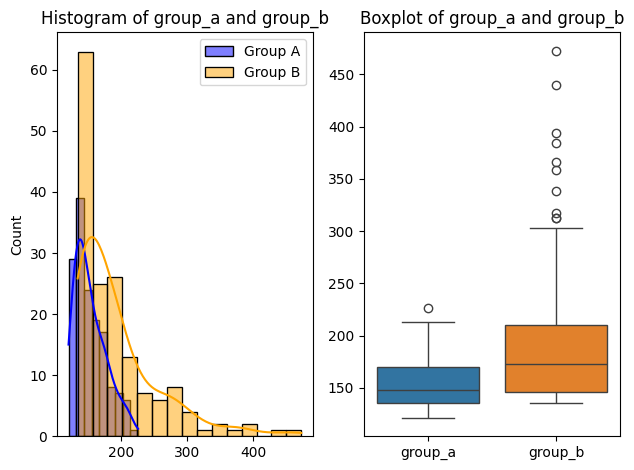

In [82]:
plt.Figure()

plt.subplot(1, 2, 1)
sns.histplot(group_a, color='blue', kde=True, label='Group A')
sns.histplot(group_b, color='orange', kde=True, label='Group B')
plt.title("Histogram of group_a and group_b")
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=[group_a, group_b])
plt.xticks([0, 1], ["group_a", "group_b"])
plt.title("Boxplot of group_a and group_b")

plt.tight_layout()
plt.show()

### 1.1.2 Рассчитайте медиану, среднее, стандартное отклонение

In [83]:
a_median = np.median(group_a)
a_mean = np.mean(group_a)
a_std = np.std(group_a, ddof=1)

b_median = np.median(group_b)
b_mean = np.mean(group_b)
b_std = np.std(group_b, ddof=1)

print(f"group_a: median = {a_median:.2f}, mean = {a_mean:.2f}, std = {a_std:.2f}")
print(f"group_b: median = {b_median:.2f}, mean = {b_mean:.2f}, std = {b_std:.2f}")

group_a: median = 148.28, mean = 154.03, std = 23.77
group_b: median = 173.00, mean = 192.55, std = 63.31


### 1.1.3 Проверьте наличие выбросов (правило 3σ или IQR \[межквартильный размах = разница между 75-процентилем и 25-процентилем\])

In [84]:
# Правило 3σ
a_outliers_3sigma = [x for x in group_a if x < (a_mean - 3*a_std) or x > (a_mean + 3*a_std)]
b_outliers_3sigma = [x for x in group_b if x < (b_mean - 3*b_std) or x > (b_mean + 3*b_std)]

# Правило IQR
a_q1, a_q3 = np.percentile(group_a, [25, 75])
a_iqr = a_q3 - a_q1
a_lower_bound = a_q1 - 1.5 * a_iqr
a_upper_bound = a_q3 + 1.5 * a_iqr
a_outliers_iqr = [x for x in group_a if x < a_lower_bound or x > a_upper_bound]

b_q1, b_q3 = np.percentile(group_b, [25, 75])
b_iqr = b_q3 - b_q1
b_lower_bound = b_q1 - 1.5 * b_iqr
b_upper_bound = b_q3 + 1.5 * b_iqr
b_outliers_iqr = [x for x in group_b if x < b_lower_bound or x > b_upper_bound]

print(f"Количество выбросов по правилу 3σ в group_a: {len(a_outliers_3sigma)}")
print(f"Количество выбросов по правилу 3σ в group_b: {len(b_outliers_3sigma)}")
print(f"Количество выбросов по правилу IQR в group_a: {len(a_outliers_iqr)}")
print(f"Количество выбросов по правилу IQR в group_b: {len(b_outliers_iqr)}")

Количество выбросов по правилу 3σ в group_a: 1
Количество выбросов по правилу 3σ в group_b: 4
Количество выбросов по правилу IQR в group_a: 1
Количество выбросов по правилу IQR в group_b: 10


### 1.2 Проверка условий

### 1.2.1 Тест Шапиро-Уилка на нормальность

In [85]:
from scipy.stats import shapiro

a_stat, a_p = shapiro(group_a)
b_stat, b_p = shapiro(group_b)

print("Результаты теста Шапиро-Уилка:")
print(f"group_a: статистика = {a_stat:.3f}, p-value = {a_p:.10f}")
print(f"group_b: статистика = {b_stat:.3f}, p-value = {b_p:.10f}")

if a_p < 0.05:
    print("В group_a данные не распределены нормально")
else:
    print("Нет оснований отвергать гипотезу о нормальности в group_a")

if b_p < 0.05:
    print("В group_b данные не распределены нормально")
else:
    print("Нет оснований отвергать гипотезу о нормальности в group_b")

Результаты теста Шапиро-Уилка:
group_a: статистика = 0.927, p-value = 0.0000006540
group_b: статистика = 0.803, p-value = 0.0000000000
В group_a данные не распределены нормально
В group_b данные не распределены нормально


### 1.2.2 Тест Левена на равенство дисперсий

In [86]:
from scipy.stats import levene

stat_levene, p_levene = levene(group_a, group_b, center='mean')

print("Результаты теста Левена:")
print(f"Статистика = {stat_levene:.3f}, p-value = {p_levene:.15f}")

if p_levene < 0.05:
    print("Дисперсии статистически значимо различаются")
else:
    print("Нет оснований считать, что дисперсии различаются")

Результаты теста Левена:
Статистика = 54.330, p-value = 0.000000000001572
Дисперсии статистически значимо различаются


### 1.2.3 Обоснуйте выбор параметрических/непараметрических методов

1. **Нормальность** нарушена в обеих группах.
2. **Дисперсии** существенно различаются.

Следовательно, **параметрические** тесты (например, классический t-тест) здесь могут дать некорректные результаты. Рекомендуется использовать **непараметрические** методы (например, U-тест Манна-Уитни), так как они не требуют предположения о нормальном распределении и устойчивы к неодинаковым дисперсиям.

### 1.3 Применение критериев

### 1.3.1 Парный t-тест (если данные нормальны)

### 1.3.2 Welch's t-test (при неравных дисперсиях)

### 1.3.3 U-тест Манна-Уитни

In [87]:
from scipy.stats import mannwhitneyu

stat_mann, p_mann = mannwhitneyu(group_a, group_b, alternative='two-sided')
print(f"U-тест Манна-Уитни: статистика = {stat_mann:.3f}, p-value = {p_mann:.10f}")

U-тест Манна-Уитни: статистика = 6842.000, p-value = 0.0000000001


### 1.4 Сравнение результатов

### 1.4.1 Объясните расхождения между параметрическими и непараметрическими методами

1. **Параметрические методы (t-тест):**  
   - Предполагают, что данные в выборках распределены нормально (или хотя бы «близко» к нормальному).  
   - Более чувствительны к выбросам и неравенству дисперсий.  
   - Могут давать некорректные результаты, если условия применимости (нормальность, равенство дисперсий и т. д.) нарушаются.

2. **Непараметрические методы (U-тест Манна–Уитни):**  
   - Не требуют предположения о нормальности.  
   - Могут быть менее мощными, когда данные действительно нормальны, но надёжнее при наличии выбросов, асимметрии и неравенстве дисперсий.  
   - Для независимых выборок с неизвестным распределением часто являются «золотым стандартом» в случае сомнений.

В нашем случае тест Шапиро-Уилка показал, что данные в обеих группах не распределены нормально, а тест Левена — что дисперсии различаются. Поэтому результаты параметрических тестов могут быть искажёнными. Непараметрический U-тест Манна–Уитни в этой ситуации более уместен и надёжен.

### 1.4.2 Сформулируйте итоговый вывод для product-менеджера

Поскольку p-value крайне мало, можно заключить, что **различия между группами статистически значимы**. Иными словами, новая версия (или экспериментальная группа) действительно отличается от старой версии (или контрольной группы) по времени загрузки (или иному показателю), и эта разница не является случайным колебанием данных.

**Рекомендация:** Учитывая статистически значимое отличие и важность метрики времени загрузки для пользовательского опыта, стоит внедрять/продолжать развивать вариант, показавший лучшие результаты. Если метрика (например, среднее время загрузки) у новой версии действительно ниже, это положительно скажется на удержании пользователей и общей эффективности продукта.

## Задача 2: Анализ вариативности в маркетинговых данных
### Контекст
Анализируется стабильность CTR двух рекламных кампаний:
- Кампания X: 200 дней наблюдений  
- Кампания Y: 200 дней наблюдений

**Цель**: Проверить гипотезу, что кампания Y имеет меньшую вариативность CTR.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import DBSCAN

campaign_x = np.concatenate([
    np.random.normal(0.05, 0.01, 150),
    np.random.normal(0.08, 0.02, 50)
])
campaign_y = np.random.beta(a=2, b=40, size=200) * 0.1

### Задания $(\Sigma 29 points)$
1. $(3 \times 3 points)$ **Первичный анализ:**
   - Рассчитайте [коэффициент вариации](https://ru.wikipedia.org/wiki/Коэффициент_вариации) для обеих кампаний
   - Постройте Q-Q plot относительно бета-распределения и выполните тест [Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) (проверка нормальности)
   - Выявите кластеры в данных (например, [методом](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [DBSCAN](https://ru.wikipedia.org/wiki/DBSCAN))

2. $(11 points)$ **Проверка гипотез:**
   -  $(4 points)$ F-тест для нормализованных данных
   -  $(4 points)$ Тест Левена с медианной центровкой
   -  $(3 points)$ Bootstrap-оценка 95% ДИ для отношения дисперсий
   
4. $(3 \times 3 points)$ **Интерпретация:**
   - Свяжите статистические выводы с бизнес-метриками:
       - (а) Сделайте статистические выводы (статистическая значимость вариативности, ДИ, кол-во кластеров)  
       - (б) Риск бюджетных потерь при нестабильности CTR
       - (в) Оптимальный размер выборки для будущих тестов

## Задача 2: Анализ стабильности CTR

### Генерация данных

In [89]:
# Создаем DataFrame
ctr_df = pd.DataFrame({
    'CTR': np.concatenate([campaign_x, campaign_y]),
    'Campaign': ['X']*200 + ['Y']*200
})

### 2.1 Первичный анализ

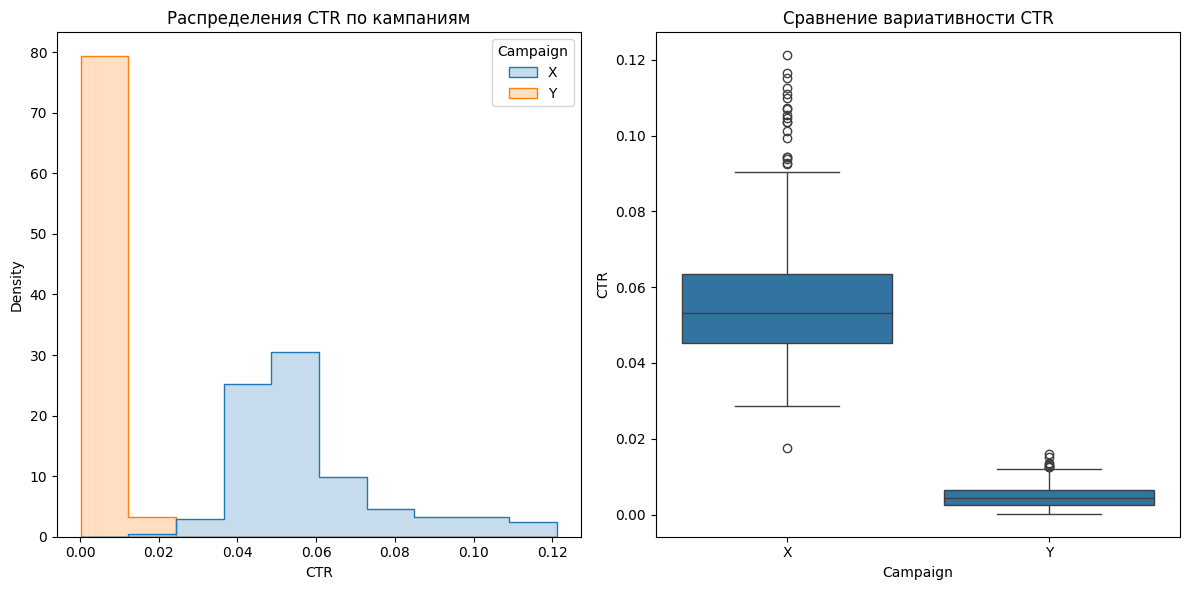

In [90]:
plt.figure(figsize=(12, 6))

# Гистограммы с ядерной оценкой плотности
plt.subplot(121)
sns.histplot(data=ctr_df, x='CTR', hue='Campaign',
             element='step', stat='density', common_norm=False)
plt.title('Распределения CTR по кампаниям')

# Боксплоты
plt.subplot(122)
sns.boxplot(data=ctr_df, x='Campaign', y='CTR')
plt.title('Сравнение вариативности CTR')
plt.tight_layout()
plt.show()

### 2.1.1 Рассчитайте [коэффициент вариации](https://ru.wikipedia.org/wiki/Коэффициент_вариации) для обеих кампаний

In [91]:
cv_x = np.std(campaign_x, ddof=1) / np.mean(campaign_x)
cv_y = np.std(campaign_y, ddof=1) / np.mean(campaign_y)

print(f"Коэффициент вариации (X): {cv_x:.4f}")
print(f"Коэффициент вариации (Y): {cv_y:.4f}")

Коэффициент вариации (X): 0.3291
Коэффициент вариации (Y): 0.6404


### 2.1.2 Постройте Q-Q plot относительно бета-распределения и выполните [Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) (проверка нормальности)

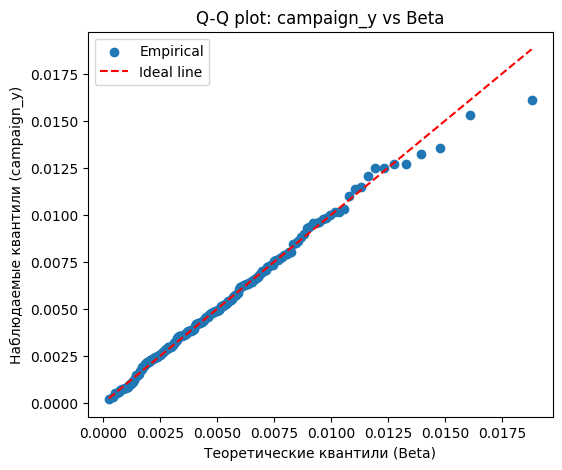

Тест Шапиро-Уилка для campaign_x: статистика = 0.8683, p-value = 0.0000000000
Тест Шапиро-Уилка для campaign_y: статистика = 0.9280, p-value = 0.0000000233


In [92]:
# Предположим, что campaign_y имеет форму бета-распределения;
# можно оценить параметры альфа и бета, зафиксировав loc=0, scale=1
alpha_y, beta_y, loc_y, scale_y = stats.beta.fit(campaign_y, floc=0, fscale=1)

# Строим Q-Q plot для campaign_y
sorted_y = np.sort(campaign_y)
n = len(sorted_y)
prob = (np.arange(n) + 0.5) / n  # квантили эмпирического распределения
theoretical_q = stats.beta.ppf(prob, alpha_y, beta_y, loc=loc_y, scale=scale_y)

plt.figure(figsize=(6, 5))
plt.scatter(theoretical_q, sorted_y, label="Empirical")
plt.plot(theoretical_q, theoretical_q, 'r--', label="Ideal line")
plt.xlabel("Теоретические квантили (Beta)")
plt.ylabel("Наблюдаемые квантили (campaign_y)")
plt.title("Q-Q plot: campaign_y vs Beta")
plt.legend()
plt.show()

# Тест Шапиро-Уилка на нормальность (для обеих кампаний)
x_stat, x_p = shapiro(campaign_x)
y_stat, y_p = shapiro(campaign_y)

print("Тест Шапиро-Уилка для campaign_x: статистика = %.4f, p-value = %.10f" % (x_stat, x_p))
print("Тест Шапиро-Уилка для campaign_y: статистика = %.4f, p-value = %.10f" % (y_stat, y_p))

### 2.1.3 Выявите кластеры в данных [методом](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [DBSCAN](https://ru.wikipedia.org/wiki/DBSCAN)

Распределение по кластерам, обнаруженным DBSCAN:
cluster
0    199
1    201
dtype: int64


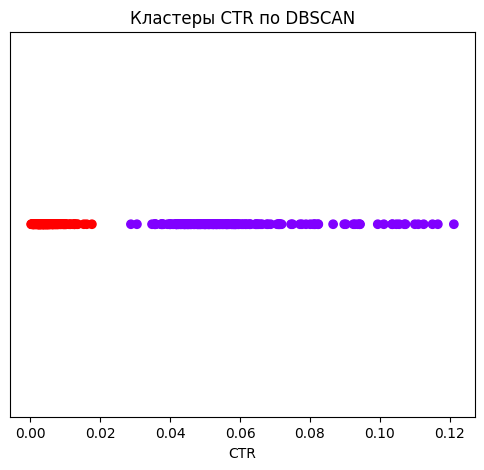

In [93]:
from sklearn.cluster import DBSCAN

X = ctr_df[['CTR']].values

dbscan_model = DBSCAN(eps=0.01, min_samples=5)
labels = dbscan_model.fit_predict(X)

ctr_df['cluster'] = labels

print("Распределение по кластерам, обнаруженным DBSCAN:")
print(ctr_df.groupby('cluster').size())

plt.figure(figsize=(6, 5))
plt.scatter(ctr_df['CTR'], np.zeros_like(ctr_df['CTR']), c=ctr_df['cluster'], cmap='rainbow')
plt.title("Кластеры CTR по DBSCAN")
plt.xlabel("CTR")
plt.yticks([])
plt.show()

### 2.2 Статистический анализ вариативности

### 2.2.1 F-тест для нормализованных данных

In [94]:
from scipy.stats import f

# Допустим, у нас есть campaign_x, campaign_y
# "Нормализуем" логарифмом (если значения не нулевые)
x_log = np.log(campaign_x + 1e-9)
y_log = np.log(campaign_y + 1e-9)

var_x_log = np.var(x_log, ddof=1)
var_y_log = np.var(y_log, ddof=1)

F_stat = var_x_log / var_y_log
df1 = len(x_log) - 1
df2 = len(y_log) - 1

# Двухсторонний F-тест
if F_stat > 1:
    p_value_f = 2 * (1 - f.cdf(F_stat, df1, df2))
else:
    p_value_f = 2 * f.cdf(F_stat, df1, df2)

print("F-тест для лог-нормализованных данных:")
print(f"F-статистика = {F_stat:.4f}, df1 = {df1}, df2 = {df2}, p-value = {p_value_f:.10f}")

F-тест для лог-нормализованных данных:
F-статистика = 0.1564, df1 = 199, df2 = 199, p-value = 0.0000000000


### 2.2.2 Тест Левена с медианной центровкой

In [95]:
from scipy.stats import levene

stat_levene, p_levene = levene(campaign_x, campaign_y, center='median')

print("Тест Левена (медианная центровка):")
print(f"Статистика = {stat_levene:.4f}, p-value = {p_levene:.6f}")

if p_levene < 0.05:
    print("Дисперсии статистически значимо различаются (p < 0.05).")
else:
    print("Нет оснований считать, что дисперсии различаются (p >= 0.05).")

Тест Левена (медианная центровка):
Статистика = 108.2191, p-value = 0.000000
Дисперсии статистически значимо различаются (p < 0.05).


### 2.2.3 Bootstrap-оценка 95% ДИ для отношения дисперсий

In [96]:
def bootstrap_var_ratio(x, y, n_boot=10000, alpha=0.05):
    ratios = []
    n_x = len(x)
    n_y = len(y)

    for _ in range(n_boot):
        sample_x = np.random.choice(x, size=n_x, replace=True)
        sample_y = np.random.choice(y, size=n_y, replace=True)
        var_x = np.var(sample_x, ddof=1)
        var_y = np.var(sample_y, ddof=1)
        # Избегаем деления на ноль
        if var_y != 0:
            ratios.append(var_x / var_y)

    ratios = np.array(ratios)
    lower = np.percentile(ratios, 100*alpha/2)
    upper = np.percentile(ratios, 100*(1 - alpha/2))

    return np.mean(ratios), (lower, upper)

mean_ratio, (ci_lower, ci_upper) = bootstrap_var_ratio(campaign_x, campaign_y)
print("Bootstrap 95% ДИ для отношения дисперсий (X/Y):")
print(f"Среднее отношение дисперсий = {mean_ratio:.4f}")
print(f"95% ДИ = [{ci_lower:.4f}, {ci_upper:.4f}]")

Bootstrap 95% ДИ для отношения дисперсий (X/Y):
Среднее отношение дисперсий = 37.8941
95% ДИ = [25.7721, 53.1898]


### 2.3 Интерпретация

Все проведенные тесты свидетельствуют о том, что дисперсии (вариативность) данных кампаний X и Y существенно различаются. Среднее отношение дисперсий (~37.9) говорит о том, что вариативность в одной из кампаний значительно выше, что может указывать на нестабильность метрики. Такой высокий уровень вариативности следует учитывать при оценке рисков (например, риска бюджетных потерь) и при планировании оптимального размера выборки для будущих тестов.